# Exploring Jupyter Notebooks


In [1]:
msg = "Hello World"
print(msg)

Hello World


In [3]:
print("Enter insert mode with cell selected | Enter")

Enter insert mode with cell selected | Enter


## Starting Plot

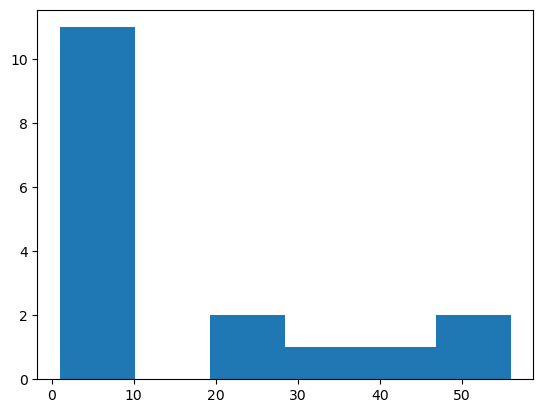

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 46, 30, 5, 6, 7, 8, 9, 10, 25, 47, 23, 3, 56]
number_of_bins = 6
plt.hist(x, number_of_bins)
plt.show()

## Data Science in VS Code Tutorial

Following: https://code.visualstudio.com/docs/datascience/data-science-tutorial